## **Agglomerative Clustering Graphs for Heart Disease** 

**Agglomerative Hierarchical clustering Technique**: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.
*   Compute the proximity matrix
*   Let each data point be a cluster
*   Repeat: Merge the two closest clusters and update the proximity matrix
*   Until only a single cluster remains

Key operation is the computation of the proximity of two clusters
To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

*   Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.
*   Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
*   Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
*   Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
*   Step- 5: Finally, all the clusters are merged together and form a single cluster.

The Hierarchical clustering Technique can be visualized using a **Dendrogram**.

A **Dendrogram** is a tree-like diagram that records the sequences of merges or splits.

## Business Logic

With the dataset of Heart Disease, I am using "Age" attribute with other attributes to analyze which age group is more prone towards Heart Disease. So in the dataset we have a total of 14 columns, each column is a feature data which directly helps in predicting the heart disease existence. Considering the "target" column as the prediction result, I have used unsupervised clustering of K-Means to figure out different clusters of 2 different columns. 
Such as:

*   Age : Cholesterol
*   Age : Resting Blood Pressure
*   Age : Max Heart Beats
*   Age : ST Depression

## Objective

To analyze which Age group is more prone for a Heart Disease.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import tensorflow as tf
from past.builtins import xrange
from itertools import cycle, islice
from datetime import datetime
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.metrics.cluster import adjusted_rand_score


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Creating a Pandas DataFrame from a CSV file

In [ ]:
filename = "https://raw.githubusercontent.com/AnishaA-git/Heart_Disease/master/heart.csv"
df = pd.read_csv(filename, sep=',', nrows=304)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## **Data Wrangling**

In [ ]:
df = df.rename(columns={"age": "Age", "sex": "Sex","cp": "ChestPain", "trestbps": "Resting_BP", "fbs": "FBS", "restecg": "Rest_ECG", "exang": "Exer_Angina",
                   "slope": "Slope","ca": "CA","thal": "Thal", "target": "Heart_Disease","chol": "Cholesterol", "thalach": "Max_HB", "oldpeak": "ST_Depresn"})
df

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Checking to see if there are any duplicated data in dataset
df[df.duplicated() == True]

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# Removing duplicate data
df.drop_duplicates(inplace=True)

df.shape

(302, 14)

## Data Sampling and Data Decscription

In [ ]:
df.head()

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Checking to see if there are any null values in our dataset.
df.isnull().any()

Age              False
Sex              False
ChestPain        False
Resting_BP       False
Cholesterol      False
FBS              False
Rest_ECG         False
Max_HB           False
Exer_Angina      False
ST_Depresn       False
Slope            False
CA               False
Thal             False
Heart_Disease    False
dtype: bool

## **EDA - Analysis and Visualizations**

In [ ]:
df.groupby('Heart_Disease').size()

Heart_Disease
0    138
1    164
dtype: int64

1.   0: No heart disease - 138
2.   1: With heart disease - 164

In [ ]:
nodisease = len(df[df.Heart_Disease == 0])
disease = len(df[df.Heart_Disease == 1])
print(f"The percentage of patients with disease, in this dataset is {round((disease/len(df.Heart_Disease)), 2)*100}% ")
print(f"The percentage of patients without disease, in this dataset is  {round((nodisease/len(df.Heart_Disease)), 2)*100}%")

The percentage of patients with disease, in this dataset is 54.0% 
The percentage of patients without disease, in this dataset is  46.0%


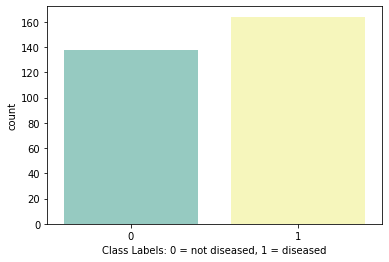

In [ ]:
sns.countplot(x='Heart_Disease', data=df, palette='Set3')
plt.xlabel("Class Labels: 0 = not diseased, 1 = diseased")
plt.show()

# Gender Impact on risk of heart disease

Research on how gender affects a person's chance of getting a heart disease

In [ ]:
m_gender = len(df[df.Sex == 1])
f_gender = len(df[df.Sex == 0])

print(" {0} male subjects computes to {1}% for males.".format(m_gender, round((m_gender/len(df.Sex)), 2)*100))
print(" {0} female subjects computes to {1}% for females.".format(f_gender, round((f_gender/len(df.Sex)), 2)*100))

 206 male subjects computes to 68.0% for males.
 96 female subjects computes to 32.0% for females.


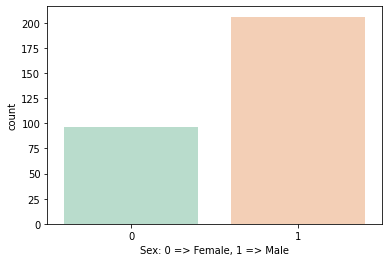

In [ ]:
# Visualizing the distribution of Male and Female genders in the data
sns.countplot(x='Sex', data=df, palette='Pastel2')
plt.xlabel("Sex: 0 => Female, 1 => Male")
plt.show()

In [ ]:
# using the crosstab method with pandas library to analyze how gender impacts on getting a heart disease
gender_impact = pd.crosstab(df['Sex'], df['Heart_Disease'])
gender_impact

Heart_Disease,0,1
Sex,,
0,24,72
1,114,92


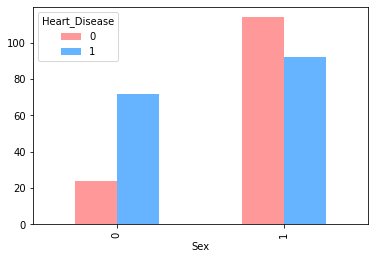

In [ ]:
# Visualize above stats for clear view
gender_impact.plot(kind='bar', stacked=False, color=['#ff9999','#66b3ff'])

# Insights:
- Number of females without heart disease = 24
- Number of females diagnosed with heart disease = 72
- Number of males without heart disease = 114
- Number of males diagnosed with heart disease = 93

From above visualizations, it is clear that females have higher risk of having heart disease as compared to male.





## Statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
Sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
ChestPain,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
Resting_BP,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
Cholesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
FBS,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
Rest_ECG,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
Max_HB,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
Exer_Angina,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
ST_Depresn,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


# Key Insights

- Total data instances: 302
- Mean age for both male and female: 54.42
- Minimum age (below this age people are not included in this case study): 29
- Maximum age (above this age people are not included in this case study): 77
- Range of chestpain: 0->3
- Range of resting blood pressure: 94->200
- Range of Cholesterol: 126.0->564.0
- Fasting Blood Sugar(FBS): 0 or 1
- Range of Resting ECG: 0->2
- Range of Maximum Heart Beat(Max_HB): 71->202


In [ ]:
# This provides us with the 'mean' subset of the describe() method
df.groupby('Heart_Disease').mean()

,Age,Sex,ChestPain,Resting_BP,Cholesterol,FBS,Rest_ECG,Max_HB,Exer_Angina,ST_Depresn,Slope,CA,Thal
Heart_Disease,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


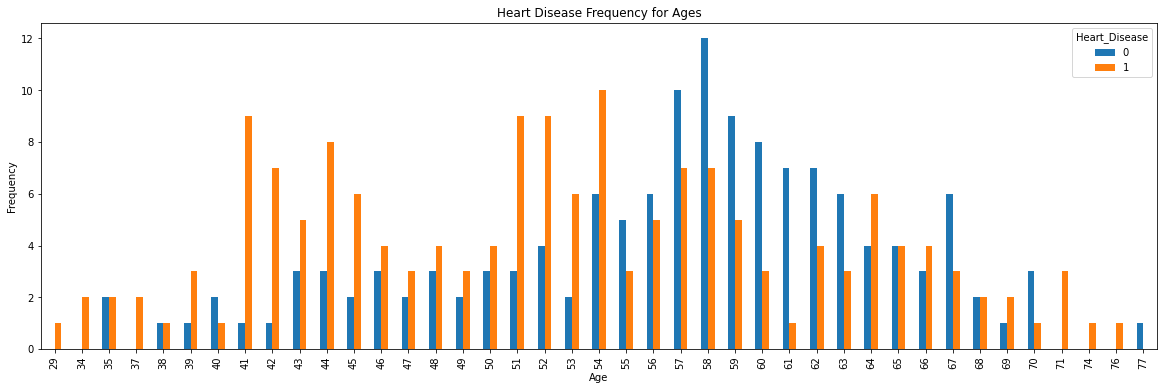

In [ ]:
pd.crosstab(df.Age,df.Heart_Disease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

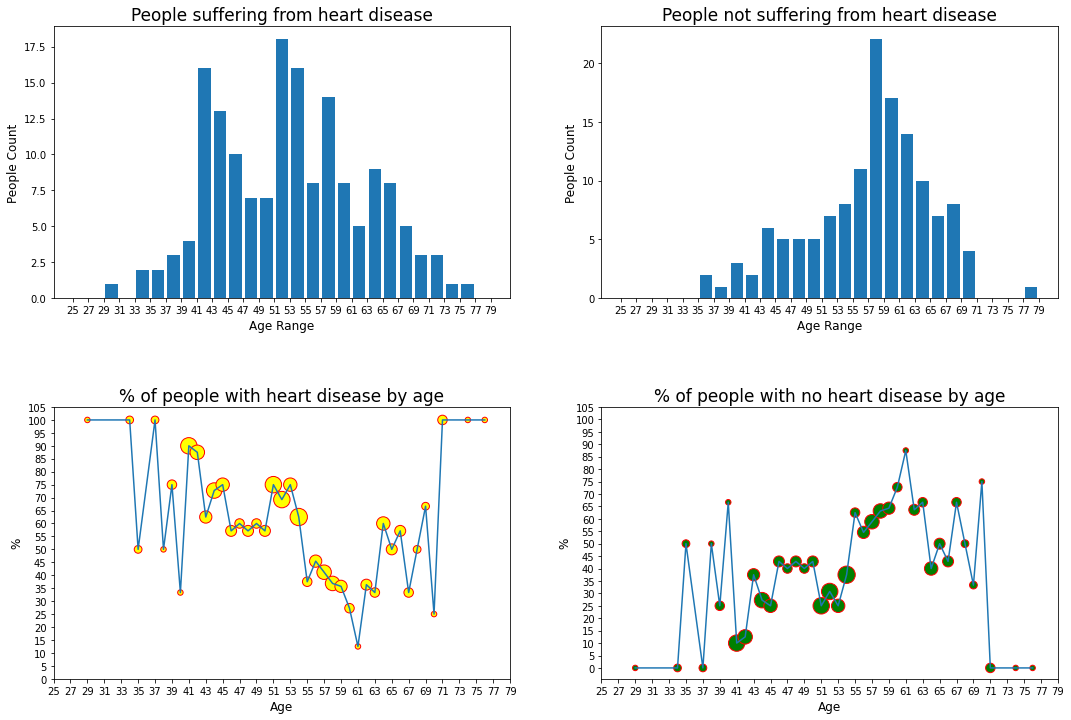

In [ ]:
# People distribution for heart disease

x = df.groupby(['Age','Heart_Disease']).agg({'Sex':'count'})
y = df.groupby(['Age']).agg({'Sex':'count'})
z = (x.div(y, level='Age') * 100)
q= 100 - z
bin_x = range(25,80,2)

fig, axis = plt.subplots(2,2, figsize = (18,12))
plt.subplots_adjust(hspace = 0.4)

axis[0,0].hist(df[df['Heart_Disease']==1].Age.tolist(),bins=bin_x,rwidth=0.8)
axis[0,0].set_xticks(range(25,80,2))
axis[0,0].set_xlabel('Age Range',fontsize=12)
axis[0,0].set_ylabel('People Count',fontsize=12)
axis[0,0].set_title('People suffering from heart disease',fontsize=17)

axis[0,1].hist(df[df['Heart_Disease']==0].Age.tolist(),bins=bin_x,rwidth=0.8)
axis[0,1].set_xticks(range(25,80,2))
axis[0,1].set_xlabel('Age Range',fontsize=12)
axis[0,1].set_ylabel('People Count',fontsize=12)
axis[0,1].set_title('People not suffering from heart disease',fontsize=17)

axis[1,0].scatter(z.xs(1,level=1).reset_index().Age,z.xs(1,level=1).reset_index().Sex,s=(x.xs(1,level=1).Sex)*30,edgecolors = 'r',c = 'yellow')
axis[1,0].plot(z.xs(1,level=1).reset_index().Age,z.xs(1,level=1).reset_index().Sex)
axis[1,0].set_xticks(range(25,80,2))
axis[1,0].set_yticks(range(0,110,5))
axis[1,0].set_xlabel('Age',fontsize=12)
axis[1,0].set_ylabel('%',fontsize=12)
axis[1,0].set_title('% of people with heart disease by age',fontsize=17)

axis[1,1].scatter(z.xs(1,level=1).reset_index().Age,q.xs(1,level=1).reset_index().Sex,s=(x.xs(1,level=1).Sex)*30,edgecolors = 'r',c = 'green')
axis[1,1].plot(z.xs(1,level=1).reset_index().Age,q.xs(1,level=1).reset_index().Sex)
axis[1,1].set_xticks(range(25,80,2))
axis[1,1].set_yticks(range(0,110,5))
axis[1,1].set_xlabel('Age',fontsize=12)
axis[1,1].set_ylabel('%',fontsize=12)
axis[1,1].set_title('% of people with no heart disease by age',fontsize=17)

plt.show()

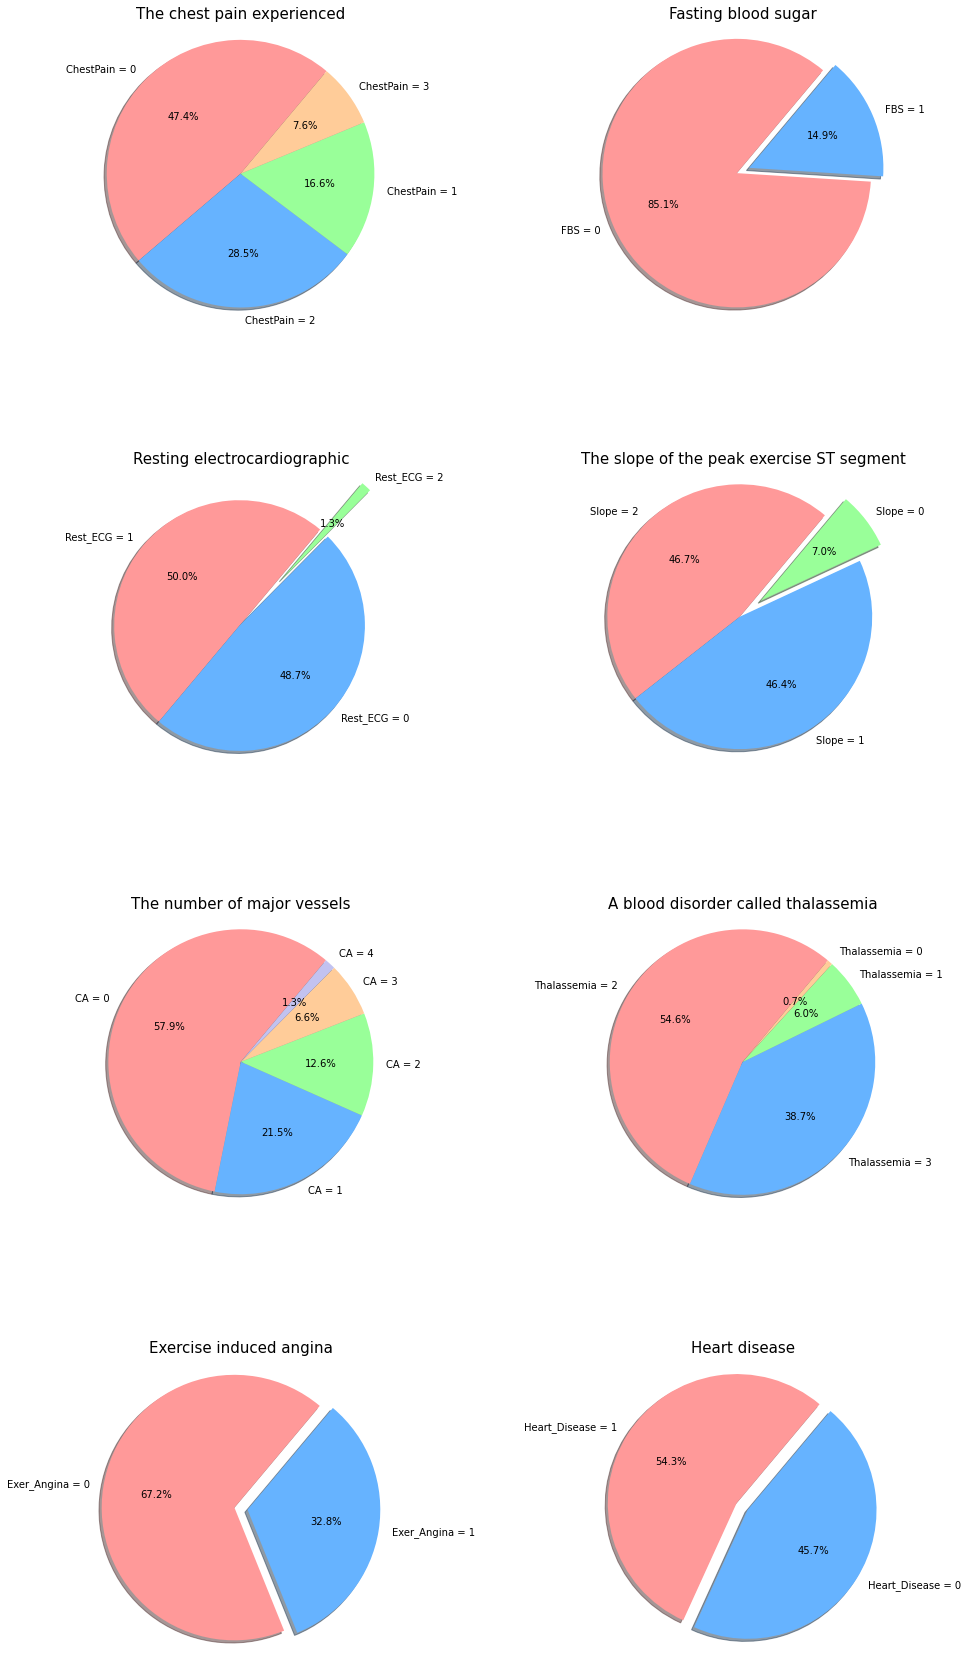

In [ ]:
fig, axis = plt.subplots(4,2, figsize = (15,30))
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)

c_cp = df['ChestPain'].value_counts()
labels = [('ChestPain = '+ str(x)) for x in c_cp.index]
axis[0,0].pie(c_cp,labels = labels,autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],shadow=True, startangle=50)
axis[0,0].axis('equal')
axis[0,0].set_title('The chest pain experienced',fontsize=15)

c_fbs = df['FBS'].value_counts()
labels = [('FBS = '+ str(x)) for x in c_fbs.index]
axis[0,1].pie(c_fbs,labels = labels,autopct='%1.1f%%',explode = [0,0.1],colors=['#ff9999','#66b3ff'],shadow=True, startangle=50)
axis[0,1].axis('equal')
axis[0,1].set_title('Fasting blood sugar',fontsize=15)

c_restecg = df['Rest_ECG'].value_counts()
labels = [('Rest_ECG = '+ str(x)) for x in c_restecg.index]
axis[1,0].pie(c_restecg,labels = labels,autopct='%1.1f%%', explode = [0,0,0.5],colors=['#ff9999','#66b3ff','#99ff99'],shadow=True, startangle=50)
axis[1,0].axis('equal')
axis[1,0].set_title('Resting electrocardiographic',fontsize=15)

c_slope = df['Slope'].value_counts()
labels = [('Slope = '+ str(x)) for x in c_slope.index]
axis[1,1].pie(c_slope,labels = labels,autopct='%1.1f%%',explode = [0,0,0.2],colors=['#ff9999','#66b3ff','#99ff99'],shadow=True, startangle=50)
axis[1,1].axis('equal')
axis[1,1].set_title('The slope of the peak exercise ST segment',fontsize=15)

c_ca = df['CA'].value_counts()
labels = [('CA = '+ str(x)) for x in c_ca.index]
axis[2,0].pie(c_ca,labels = labels,autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'],shadow=True, startangle=50)
axis[2,0].axis('equal')
axis[2,0].set_title('The number of major vessels',fontsize=15)

c_thal = df['Thal'].value_counts()
labels = [('Thalassemia = '+ str(x)) for x in c_thal.index]
axis[2,1].pie(c_thal,labels = labels,autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],shadow=True, startangle=50)
axis[2,1].axis('equal')
axis[2,1].set_title('A blood disorder called thalassemia',fontsize=15)

c_exang = df['Exer_Angina'].value_counts()
labels = [('Exer_Angina = '+ str(x)) for x in c_exang.index]
axis[3,0].pie(c_exang,labels = labels,autopct='%1.1f%%',explode = [0,0.1],colors=['#ff9999','#66b3ff'],shadow=True, startangle=50)
axis[3,0].axis('equal')
axis[3,0].set_title('Exercise induced angina',fontsize=15)

c_target = df['Heart_Disease'].value_counts()
labels = [('Heart_Disease = '+ str(x)) for x in c_target.index]
axis[3,1].pie(c_target,labels = labels,autopct='%1.1f%%',explode = [0,0.1],colors=['#ff9999','#66b3ff'],shadow=True, startangle=50)
axis[3,1].axis('equal')
axis[3,1].set_title('Heart disease',fontsize=15)

plt.show()

## Data Columns

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'Resting_BP', 'Cholesterol', 'FBS',
       'Rest_ECG', 'Max_HB', 'Exer_Angina', 'ST_Depresn', 'Slope', 'CA',
       'Thal', 'Heart_Disease'],
      dtype='object')

# Cluster Calculation

## Dendogram

In [ ]:
def calcDendogram(col1,col2):
  best_cols=[col1.name,col2.name]
  best_vals = df[best_cols].iloc[ :, [0,1]].values
  plt.figure(figsize=(10, 7))
  plt.title("Dendogram")
  dend = shc.dendrogram(shc.linkage(best_vals, method='ward'))
  

## **Code Snippet for Agglomerative Clustering**

In [ ]:
def Agglomerative_clustering_scikit(col1,col2,n):

  start=datetime.now()
  print("starttime",start)

  # fig, axis = plt.subplots(1,3, figsize = (15,5))
  # plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
  best_cols=[col1.name,col2.name]
  agg_ward = AgglomerativeClustering(n_clusters=n, linkage='ward',affinity='euclidean')
  agg_average = AgglomerativeClustering(n_clusters=n, linkage='average',affinity='cityblock')
  agg_complete = AgglomerativeClustering(n_clusters=n, linkage='complete',affinity='cityblock')

  best_vals = df[best_cols].iloc[ :, [0,1]].values

  print(datetime.now()-start)
  y_pred_ward = agg_ward.fit_predict(best_vals)
  y_pred_average = agg_average.fit_predict(best_vals)
  y_pred_complete = agg_complete.fit_predict(best_vals)
  print(datetime.now()-start)

  df["Agglomerative_cluster_ward"] = y_pred_ward
  df["Agglomerative_cluster_average"] = y_pred_average
  df["Agglomerative_cluster_complete"] = y_pred_complete

  best_cols.append("Agglomerative_cluster_ward")
  best_cols.append("Agglomerative_cluster_average")
  best_cols.append("Agglomerative_cluster_complete")

  # Number of points in clusters
  print("Number of points in clusters:\n", df['Agglomerative_cluster_ward'].value_counts())
  # silhouette_scores1 = metrics.silhouette_score(best_vals, y_pred_ward,metric='euclidean')
  # print("Silhouette Score Ward", silhouette_scores1)
  # samples_score1 = metrics.silhouette_samples(best_vals, y_pred_ward)
  # sns.distplot(samples_score1,ax=axis[0]).set(title="Silhouette Score Ward")
  # adjusted_score1 = adjusted_rand_score(best_vals[:,-1], y_pred_ward) 
  # print("adjusted_rand_score", adjusted_score1)

  # Number of points in clusters
  print("Number of points in clusters:\n", df['Agglomerative_cluster_average'].value_counts())
  # silhouette_scores2 = metrics.silhouette_score(best_vals, y_pred_average,metric='euclidean')
  # print("Silhouette Score Average", silhouette_scores2)
  # samples_score2 = metrics.silhouette_samples(best_vals, y_pred_average)
  # sns.distplot(samples_score2,ax=axis[1]).set(title="Silhouette Score Average")
  # adjusted_score2 = adjusted_rand_score(best_vals[:,-1], y_pred_average) 
  # print("adjusted_rand_score", adjusted_score2) 

  # Number of points in clusters
  print("Number of points in clusters:\n", df['Agglomerative_cluster_complete'].value_counts())
  # silhouette_scores3 = metrics.silhouette_score(best_vals, y_pred_complete,metric='euclidean')
  # print("Silhouette Score Complete", silhouette_scores3)
  # samples_score3 = metrics.silhouette_samples(best_vals, y_pred_complete)
  # sns.distplot(samples_score3,ax=axis[2]).set(title="Silhouette Score Complete")
  # adjusted_score3 = adjusted_rand_score(best_vals[:,-1], y_pred_complete) 
  # print("adjusted_rand_score", adjusted_score3) 

  sns.lmplot(data=df, x=col1.name, y=col2.name, hue='Agglomerative_cluster_ward', fit_reg=False, legend=True, legend_out=True).set(title="Agglomerative_cluster_ward")
  sns.lmplot(data=df, x=col1.name, y=col2.name, hue='Agglomerative_cluster_average', fit_reg=False, legend=True, legend_out=True).set(title="Agglomerative_cluster_average")
  sns.lmplot(data=df, x=col1.name, y=col2.name, hue='Agglomerative_cluster_complete', fit_reg=False, legend=True, legend_out=True).set(title="Agglomerative_cluster_complete")
  

## Scatter Plot for Age and Cholesterol

Text(0, 0.5, 'Cholesterol')

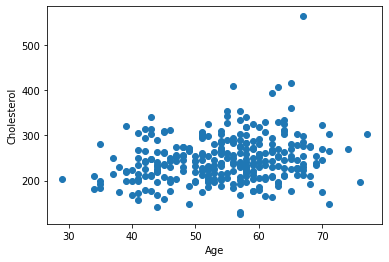

In [ ]:
plt.scatter(df['Age'],df['Cholesterol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')

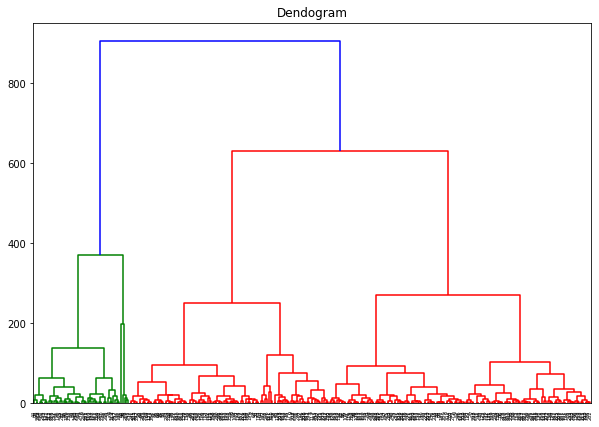

In [ ]:
calcDendogram(df['Age'],df['Cholesterol'])

starttime 2021-11-19 23:18:08.068770
0:00:00.004989
0:00:00.015510
Number of points in clusters:
 0    108
4     74
2     68
3     47
1      5
Name: Agglomerative_cluster_ward, dtype: int64
Number of points in clusters:
 0    196
1     69
4     32
3      4
2      1
Name: Agglomerative_cluster_average, dtype: int64
Number of points in clusters:
 1    127
0    114
2     56
4      4
3      1
Name: Agglomerative_cluster_complete, dtype: int64


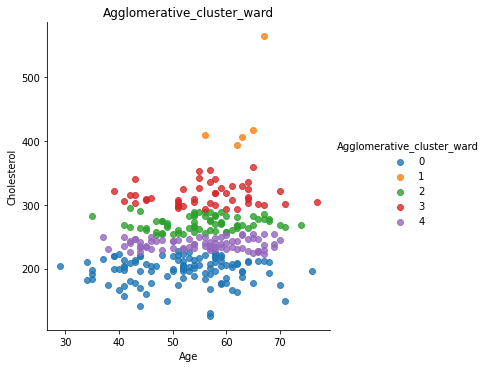

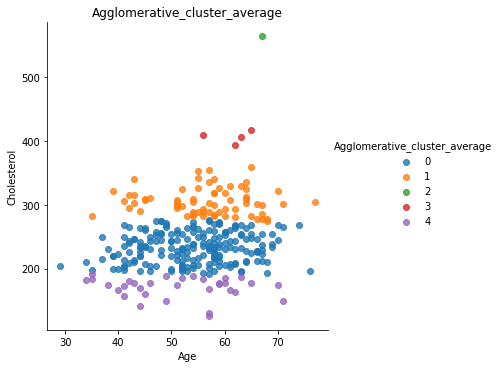

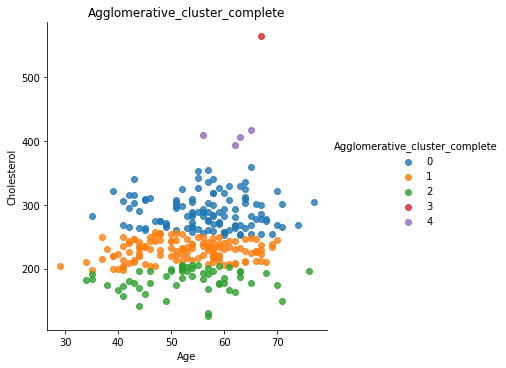

In [ ]:
Agglomerative_clustering_scikit(df['Age'], df['Cholesterol'],5)

## Scatter Plot for Age and Resting Blood Pressure

Text(0, 0.5, 'Resting Blood Pressure')

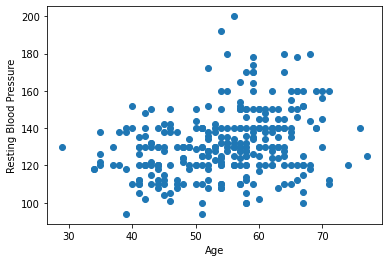

In [ ]:
plt.scatter(df['Age'],df['Resting_BP'])
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')

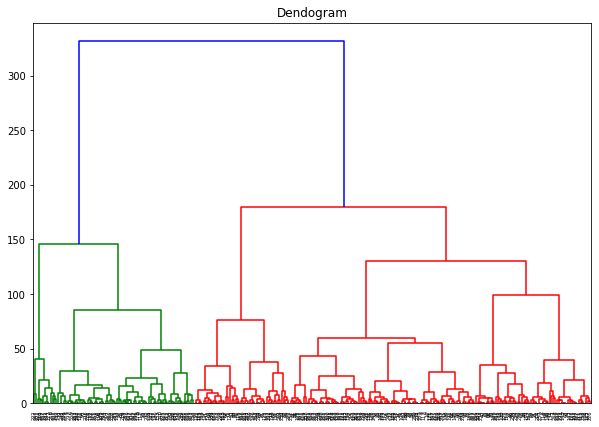

In [ ]:
calcDendogram(df['Age'],df['Resting_BP'])

starttime 2021-11-19 23:18:18.004813
0:00:00.003345
0:00:00.016184
Number of points in clusters:
 4    100
1     74
0     63
2     52
3     13
Name: Agglomerative_cluster_ward, dtype: int64
Number of points in clusters:
 0    215
1     41
3     25
4     19
2      2
Name: Agglomerative_cluster_average, dtype: int64
Number of points in clusters:
 3    109
4     62
0     62
1     56
2     13
Name: Agglomerative_cluster_complete, dtype: int64


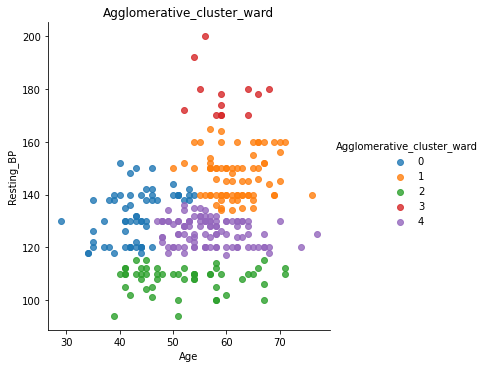

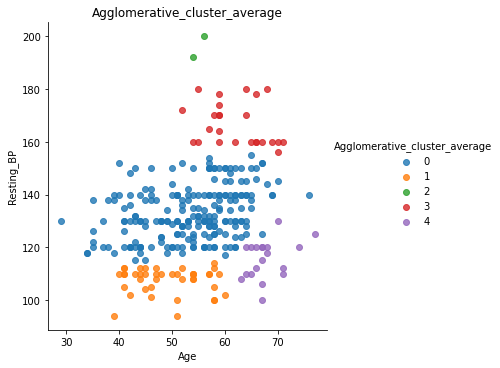

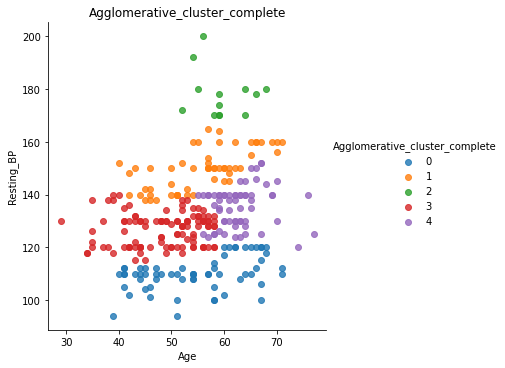

In [ ]:
Agglomerative_clustering_scikit(df['Age'], df['Resting_BP'],5)

## Scatter Plot for Age and Max Heart Beats

Text(0, 0.5, 'Max Heart Beats')

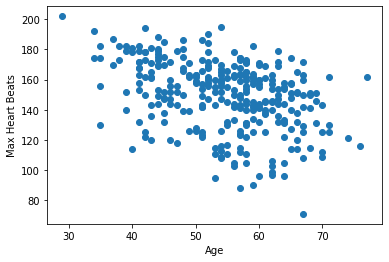

In [ ]:
plt.scatter(df['Age'],df['Max_HB'])
plt.xlabel('Age')
plt.ylabel('Max Heart Beats')

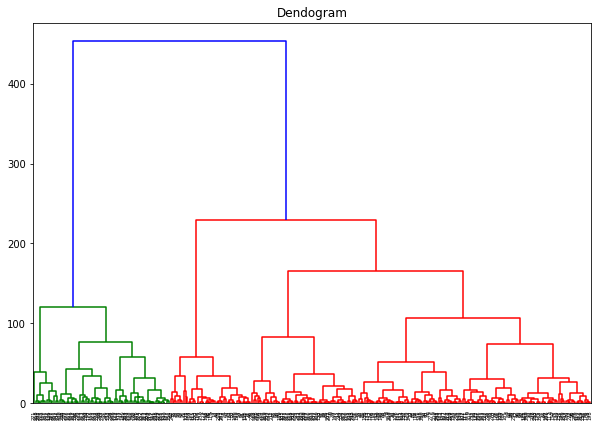

In [ ]:
calcDendogram(df['Age'],df['Max_HB'])

starttime 2021-11-19 23:18:27.914151
0:00:00.002867
0:00:00.016584
Number of points in clusters:
 0    126
3     60
1     58
2     44
4     14
Name: Agglomerative_cluster_ward, dtype: int64
Number of points in clusters:
 4    170
0     76
1     54
3      1
2      1
Name: Agglomerative_cluster_average, dtype: int64
Number of points in clusters:
 2    141
1     82
0     74
4      4
3      1
Name: Agglomerative_cluster_complete, dtype: int64


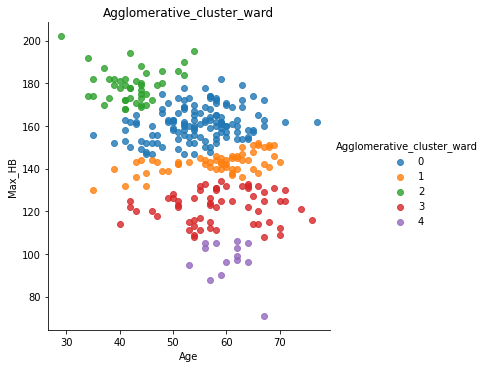

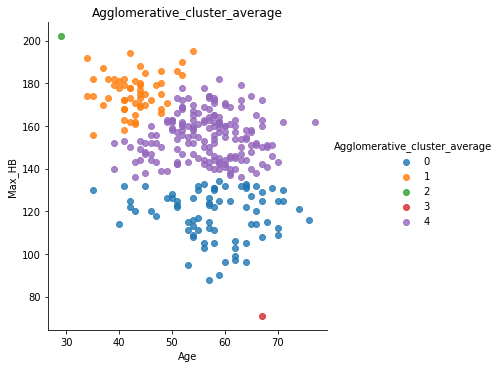

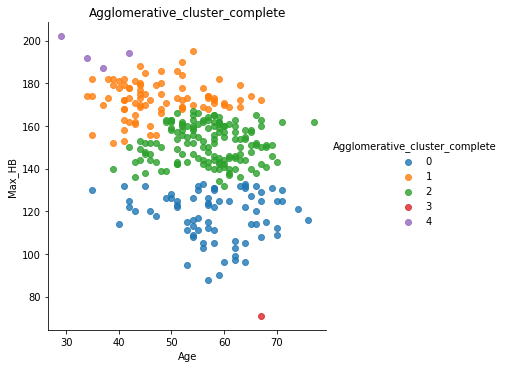

In [ ]:
Agglomerative_clustering_scikit(df['Age'], df['Max_HB'],5)

## Scatter Plot for Age and ST Depression

Text(0, 0.5, 'ST Depression')

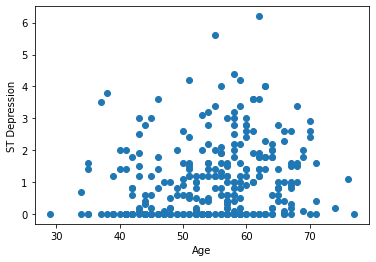

In [ ]:
plt.scatter(df['Age'],df['ST_Depresn'])
plt.xlabel('Age')
plt.ylabel('ST Depression')

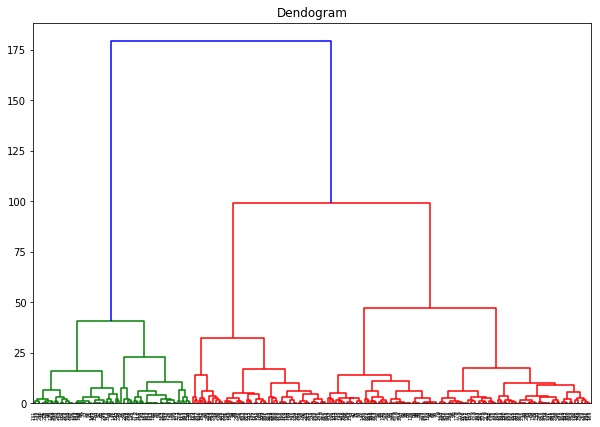

In [ ]:
calcDendogram(df['Age'],df['ST_Depresn'])

starttime 2021-11-19 23:18:37.845311
0:00:00.005067
0:00:00.014487
Number of points in clusters:
 1    83
0    73
3    60
4    47
2    39
Name: Agglomerative_cluster_ward, dtype: int64
Number of points in clusters:
 0    175
3     77
2     38
1      9
4      3
Name: Agglomerative_cluster_average, dtype: int64
Number of points in clusters:
 0    108
1    106
3     47
2     34
4      7
Name: Agglomerative_cluster_complete, dtype: int64


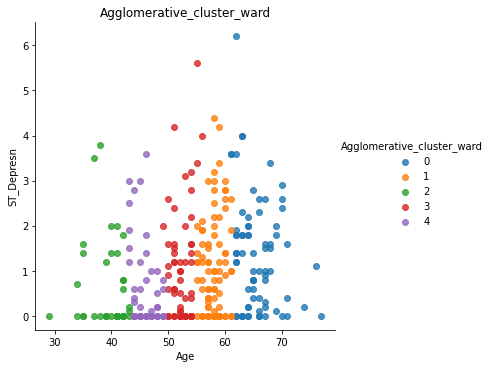

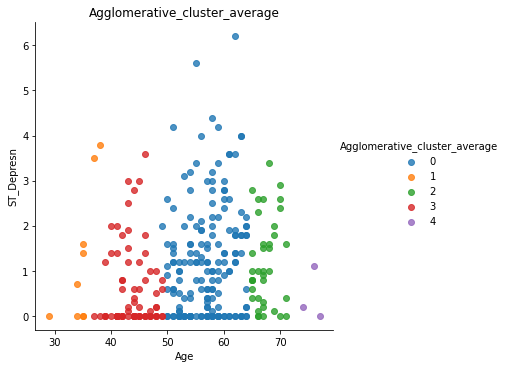

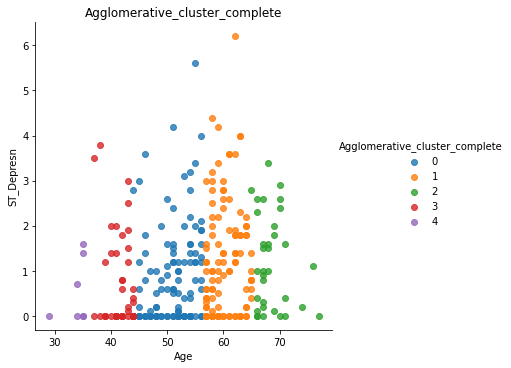

In [ ]:
Agglomerative_clustering_scikit(df['Age'], df['ST_Depresn'],5)

## **Finding**

From above graph analysis:

*   Age : Cholesterol - between age 50-60, Cholesterol level is more 
*   Age : Resting Blood Pressure - between age 50-60, Resting Blood Pressure Readings are more
*   Age : Max Heart Beats - the Heart Beats are decreasing with the increase in age
*   Age : ST Depression - between age 50-60, ST Depression level is more


Considering all these, the Objective of these clustering is that between age 50-60 the chances of Heart disease is more.

Comparision of Clustering Methods to find Number of Clusters and visualizations: https://github.com/AnishaA-git/Heart_Disease/blob/master/table_final.pdf

Adding to these points: 
1. Performance is better in k-Means as compared to GMM and Agglomerative Clustering.
2. Clusters are much denser and clearer in k means. We can see GMM has considered probablistic data points.
3. Number of Clusters is more in Agglomerative as compared to K-Means and GMM.
4. Silhouette score came slightly better in kmeans than GMM.
